In [14]:
import pandas as pd
from constants import ZEV_STATES
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file = "data/lur_no2/lur_no2_merged_with_pop_v5.csv"

In [16]:
df = pd.read_csv(file)

In [17]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name', 'State Code', 'EPA Region']]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')

In [18]:
df = df.merge(epa_region, left_on='state_code', right_on='State Code', how='left')

In [19]:
df['zev'] = df['state_code'].apply(lambda x:1 if x in ZEV_STATES else 0)

In [8]:
mdf = df.groupby(['zev', 'year']).agg({'pred_wght_y': list}).reset_index()

In [9]:
mdf

,zev,year,pred_wght_y
0,0,2010,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0,2011,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0,2012,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0,2013,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0,2014,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
5,0,2015,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
6,0,2016,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,0,2017,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,0,2018,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,0,2019,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [10]:
sns.set_style('white')
cmap = plt.get_cmap('tab20c')

t = []
for year in mdf['year'].unique():
    zev = mdf[(mdf['year']==year)&(mdf['zev']==1)]['pred_wght_y'].values[0]
    non = mdf[(mdf['year']==year)&(mdf['zev']==0)]['pred_wght_y'].values[0]
    zev = [i for i in zev if not pd.isna(i)]
    non = [i for i in non if not pd.isna(i)]
    t.extend([zev, non])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c1fa0f340>,
 'caps': [<matplotlib.lines.Line2D at 0x14c1fa0f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c1f7e5eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x14c1fa0fe80>,
 'fliers': [<matplotlib.lines.Line2D at 0x14c1fa23190>,
 'means': []}

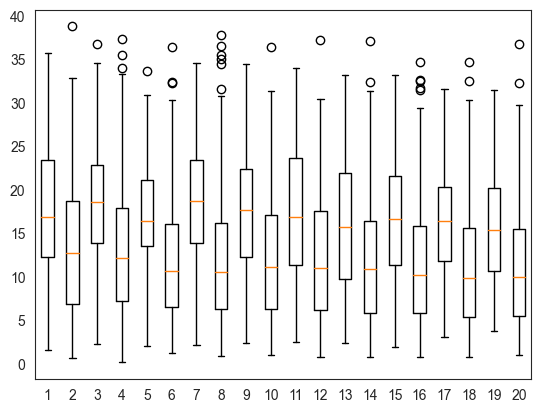

In [11]:
plt.boxplot(t)

<AxesSubplot:xlabel='year', ylabel='pred_wght'>

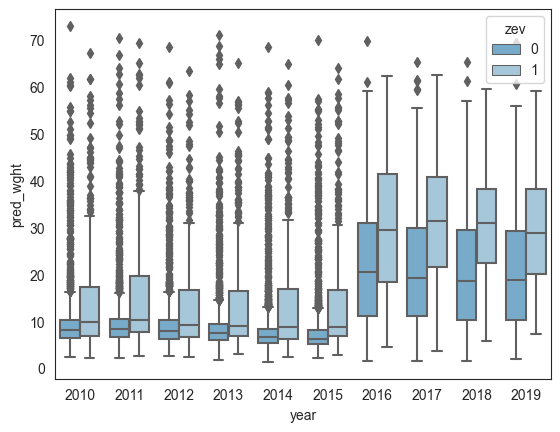

In [12]:
my_colors = [cmap(1), cmap(2)] * 10
sns.set_palette( my_colors )

sns.boxplot(data=df, x="year", y="pred_wght", hue="zev")

In [13]:
t[1]

[29.620833300000005,
 18.890833400000005,
 18.9416666,
 17.141666600000004,
 29.118261,
 38.7988144,
 10.0,
 2.3804547000000005,
 22.6833336,
 26.0043478,
 13.552717700000002,
 17.6916666,
 12.064855000000009,
 11.13750030000001,
 14.800000000000011,
 10.920833600000002,
 11.7889496,
 12.783333000000002,
 7.358333400000001,
 23.8416668,
 4.25,
 7.820833199999999,
 4.493478300000001,
 15.5625,
 3.4891305,
 32.8583852,
 16.2041664,
 26.4625002,
 22.5016664,
 19.408333,
 16.7708332,
 14.605797000000004,
 14.345833,
 4.25,
 14.8166666,
 6.2374999,
 21.858333,
 15.739130600000005,
 10.043478,
 12.113043800000002,
 16.68695660000001,
 14.8086958,
 13.6333334,
 12.685,
 16.449999799999997,
 9.491667000000003,
 14.6625003,
 5.466666800000002,
 18.4015152,
 13.842262000000002,
 1.4541664000000003,
 20.95151520000001,
 19.109420000000007,
 3.924999800000002,
 17.61666690000001,
 9.878260600000004,
 9.958333300000003,
 14.6999997,
 23.1416666,
 10.475000199999998,
 4.416667,
 16.181884200000002,


In [66]:
(cmap(1), cmap(2))*5

((0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706, 1.0))

In [43]:
mdf[mdf['state_code'] == 6]

,state_code,year,pred_wght,avg,max,90_per,conc,med,95_per
40,6,2010,"[40.639953232, 10.054470015999998, 4.416944588...",21.929629,61.580254,44.707190,"[40.639953232, 10.054470015999998, 4.416944588...",20.667049,48.226934
41,6,2011,"[42.98742557199999, 6.395008416000008, 5.22747...",23.436308,61.835280,44.750621,"[42.98742557199999, 6.395008416000008, 5.22747...",23.055248,52.603356
42,6,2012,"[37.353147352, 5.243059536000002, 4.6609841213...",21.456730,58.139855,40.047765,"[37.353147352, 5.243059536000002, 4.6609841213...",20.669783,48.395887
43,6,2013,"[45.116731056, 6.189516400000002, 6.1100852799...",23.721753,56.967270,45.743996,"[45.116731056, 6.189516400000002, 6.1100852799...",22.359637,51.266107
44,6,2014,"[41.61339204, 4.421846847999999, 3.80472148925...",20.581223,60.349710,41.651273,"[41.61339204, 4.421846847999999, 3.80472148925...",16.802568,49.227355
45,6,2015,"[41.8492465, 4.122051807999999, 4.587803183521...",20.118436,61.731367,39.125380,"[41.8492465, 4.122051807999999, 4.587803183521...",17.332579,48.833907
46,6,2016,"[38.371617424, nan, nan, 18.59565246, nan, nan...",29.029075,62.350608,43.254060,"[38.371617424, 18.59565246, 21.324105108, 38.8...",28.214713,54.190837
47,6,2017,"[43.814626700000005, nan, nan, 21.311026136, n...",30.904923,62.553083,47.854953,"[43.814626700000005, 21.311026136, 24.28469508...",31.237425,55.617294
48,6,2018,"[41.928904168, nan, nan, 21.71154848, nan, nan...",29.832476,59.536466,43.505893,"[41.928904168, 21.71154848, 23.416625948, 41.7...",29.941473,53.211264
49,6,2019,"[39.409704168000005, nan, nan, 27.812556816000...",28.097722,59.158798,42.118658,"[39.409704168000005, 27.812556816000004, 21.96...",28.294817,47.690586
